<img src="https://certificate.tpq.io/taim_logo.png" width="350px" align="right">

# Artificial Intelligence in Finance

## Execution & Deployment

Dr Yves J Hilpisch | The AI Machine

http://aimachine.io | http://twitter.com/dyjh

In [1]:
import os
import time
import numpy as np
import pandas as pd
from pprint import pprint
from pylab import plt, mpl
plt.style.use('seaborn-v0_8')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.float_format', '{:.5f}'.format)
np.set_printoptions(suppress=True, precision=4)
os.environ['PYTHONHASHSEED'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '5'

## Oanda Account

``pip install --upgrade git+https://github.com/yhilpisch/tpqoa.git``

Configuration file ``aiif.cfg``:

    [oanda]
    account_id = XYZ-ABC-...
    access_token = ZYXCAB...
    account_type = practice

In [2]:
import tpqoa

In [3]:
api = tpqoa.tpqoa('../aiif.cfg')

In [4]:
ins = api.get_instruments()

In [5]:
ins[:5]

[('AUD/CAD', 'AUD_CAD'),
 ('AUD/CHF', 'AUD_CHF'),
 ('AUD/HKD', 'AUD_HKD'),
 ('AUD/JPY', 'AUD_JPY'),
 ('AUD/NZD', 'AUD_NZD')]

## Data Retrieval 

In [6]:
raw = api.get_history(instrument='EUR_USD',
                      start='2018-01-01',
                      end='2020-07-31',
                      granularity='D',
                      price='A')

In [7]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 671 entries, 2018-01-01 22:00:00 to 2020-07-30 21:00:00
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   o         671 non-null    float64
 1   h         671 non-null    float64
 2   l         671 non-null    float64
 3   c         671 non-null    float64
 4   volume    671 non-null    int64  
 5   complete  671 non-null    bool   
dtypes: bool(1), float64(4), int64(1)
memory usage: 32.1 KB


In [8]:
raw.head()

,o,h,l,c,volume,complete
time,,,,,,
2018-01-01 22:00:00,1.20101,1.20819,1.20051,1.20610,35630,True
2018-01-02 22:00:00,1.20620,1.20673,1.20018,1.20170,31354,True
2018-01-03 22:00:00,1.20170,1.20897,1.20049,1.20710,35187,True
2018-01-04 22:00:00,1.20692,1.20847,1.20215,1.20327,36478,True
2018-01-07 22:00:00,1.20301,1.20530,1.19564,1.19717,27618,True


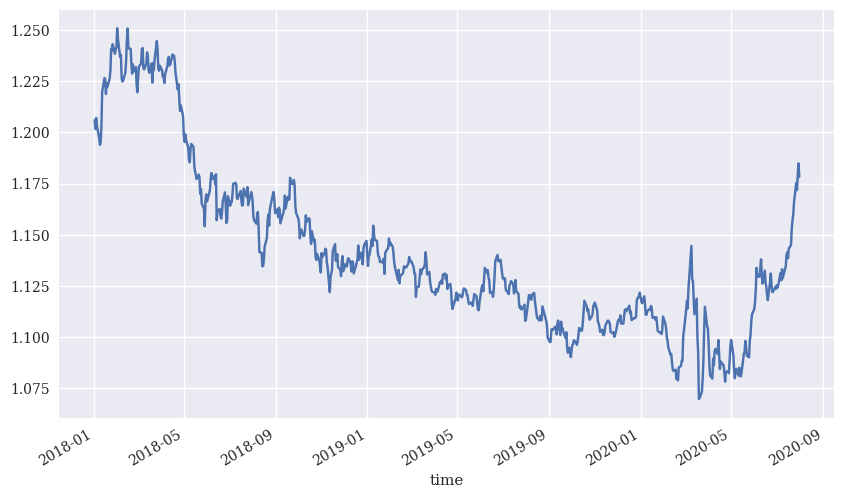

In [9]:
raw['c'].plot(figsize=(10, 6));

In [10]:
%%time
raw = api.get_history(instrument='EUR_USD',
                      start='2020-07-01',
                      end='2020-07-31',
                      granularity='M1',
                      price='M') 

CPU times: user 1 s, sys: 30.2 ms, total: 1.03 s
Wall time: 4.34 s


In [11]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30729 entries, 2020-07-01 00:00:00 to 2020-07-31 00:00:00
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   o         30729 non-null  float64
 1   h         30729 non-null  float64
 2   l         30729 non-null  float64
 3   c         30729 non-null  float64
 4   volume    30729 non-null  int64  
 5   complete  30729 non-null  bool   
dtypes: bool(1), float64(4), int64(1)
memory usage: 1.4 MB


In [12]:
raw.tail()

,o,h,l,c,volume,complete
time,,,,,,
2020-07-30 23:56:00,1.18736,1.18758,1.18722,1.18757,57,True
2020-07-30 23:57:00,1.18756,1.18756,1.18734,1.18734,49,True
2020-07-30 23:58:00,1.18736,1.18737,1.18713,1.18717,36,True
2020-07-30 23:59:00,1.18718,1.18724,1.18714,1.18722,31,True
2020-07-31 00:00:00,1.18721,1.18752,1.18695,1.18750,120,True


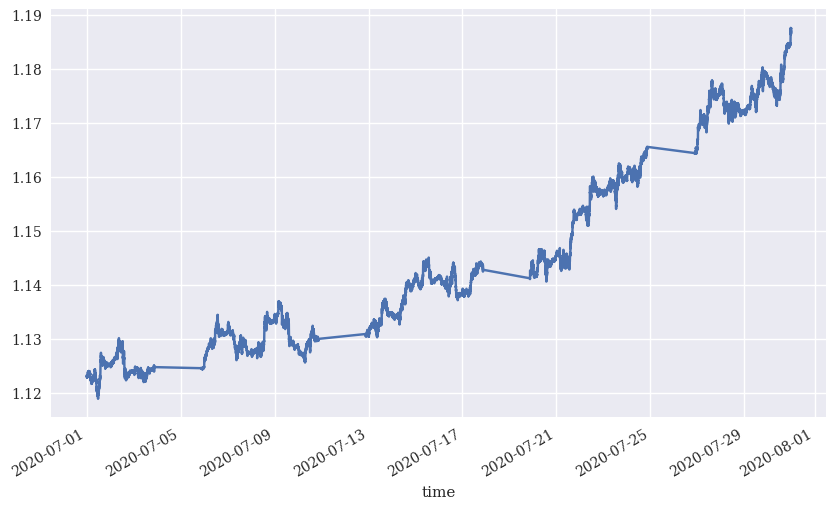

In [13]:
raw['c'].plot(figsize=(10, 6));

In [14]:
api.stream_data('EUR_USD', stop=1)

2023-10-09T19:54:14.472676592Z 1.05684 1.05699


## Order Execution 

In [15]:
order = api.create_order('EUR_USD', units=25000,
                         suppress=True, ret=True)
pprint(order)

{'accountBalance': '101160.3048',
 'accountID': '101-004-13834683-001',
 'batchID': '3870',
 'commission': '0.0',
 'financing': '0.0',
 'fullPrice': {'asks': [{'liquidity': '10000000', 'price': 1.05699}],
               'bids': [{'liquidity': '10000000', 'price': 1.05684}],
               'closeoutAsk': 1.05699,
               'closeoutBid': 1.05684,
               'type': 'PRICE'},
 'fullVWAP': 1.05699,
 'gainQuoteHomeConversionFactor': '0.941419134945',
 'guaranteedExecutionFee': '0.0',
 'halfSpreadCost': '1.774',
 'id': '3871',
 'instrument': 'EUR_USD',
 'lossQuoteHomeConversionFactor': '0.950880633789',
 'orderID': '3870',
 'pl': '0.0',
 'price': 1.05699,
 'reason': 'MARKET_ORDER',
 'requestID': '25131634353985546',
 'time': '2023-10-09T19:54:17.216109704Z',
 'tradeOpened': {'guaranteedExecutionFee': '0.0',
                 'halfSpreadCost': '1.774',
                 'initialMarginRequired': '832.5',
                 'price': 1.05699,
                 'tradeID': '3871',
           

In [16]:
def print_details(order):
    details = (order['time'][:-7], order['instrument'], order['units'],
               order['price'], order['pl'])
    return details

In [17]:
print_details(order)

('2023-10-09T19:54:17.216', 'EUR_USD', '25000.0', 1.05699, '0.0')

In [18]:
time.sleep(1)

In [19]:
order = api.create_order('EUR_USD', units=-25000,
                         suppress=True, ret=True)
pprint(order)

{'accountBalance': '101156.739',
 'accountID': '101-004-13834683-001',
 'batchID': '3872',
 'commission': '0.0',
 'financing': '0.0',
 'fullPrice': {'asks': [{'liquidity': '9975000', 'price': 1.05699}],
               'bids': [{'liquidity': '10000000', 'price': 1.05684}],
               'closeoutAsk': 1.05699,
               'closeoutBid': 1.05684,
               'type': 'PRICE'},
 'fullVWAP': 1.05684,
 'gainQuoteHomeConversionFactor': '0.941419134945',
 'guaranteedExecutionFee': '0.0',
 'halfSpreadCost': '1.774',
 'id': '3873',
 'instrument': 'EUR_USD',
 'lossQuoteHomeConversionFactor': '0.950880633789',
 'orderID': '3872',
 'pl': '-3.5658',
 'price': 1.05684,
 'reason': 'MARKET_ORDER',
 'requestID': '25131634358181247',
 'time': '2023-10-09T19:54:18.450517162Z',
 'tradesClosed': [{'financing': '0.0',
                   'guaranteedExecutionFee': '0.0',
                   'halfSpreadCost': '1.774',
                   'price': 1.05684,
                   'realizedPL': '-3.5658',
       

In [20]:
print_details(order)

('2023-10-09T19:54:18.450', 'EUR_USD', '-25000.0', 1.05684, '-3.5658')

In [21]:
time.sleep(1)

In [22]:
order = api.create_order('EUR_USD', units=25000,
                         sl_distance=0.005,
                         suppress=True, ret=True)

In [23]:
print_details(order)

('2023-10-09T19:54:19.847', 'EUR_USD', '25000.0', 1.05699, '0.0')

In [24]:
sl_order = api.get_transaction(tid=int(order['id']) + 1)

In [25]:
sl_order

{'id': '3876',
 'time': '2023-10-09T19:54:19.847186706Z',
 'userID': 13834683,
 'accountID': '101-004-13834683-001',
 'batchID': '3874',
 'requestID': '25131634362377218',
 'type': 'STOP_LOSS_ORDER',
 'tradeID': '3875',
 'price': 1.05199,
 'distance': '0.005',
 'timeInForce': 'GTC',
 'triggerCondition': 'DEFAULT',
 'reason': 'ON_FILL'}

In [26]:
(sl_order['time'], sl_order['type'], order['price'],
 sl_order['price'], sl_order['distance'])

('2023-10-09T19:54:19.847186706Z',
 'STOP_LOSS_ORDER',
 1.05699,
 1.05199,
 '0.005')

In [27]:
time.sleep(1)

In [28]:
order = api.create_order('EUR_USD', units=-25000, suppress=True, ret=True)

In [29]:
print_details(order)

('2023-10-09T19:54:21.901', 'EUR_USD', '-25000.0', 1.05684, '-3.5658')

In [30]:
order = api.create_order('EUR_USD', units=25000,
                         tsl_distance=0.005,
                         suppress=True, ret=True)

In [31]:
print_details(order)

('2023-10-09T19:54:22.173', 'EUR_USD', '25000.0', 1.05699, '0.0')

In [32]:
tsl_order = api.get_transaction(tid=int(order['id']) + 1)

In [33]:
tsl_order

{'id': '3882',
 'time': '2023-10-09T19:54:22.173613682Z',
 'userID': 13834683,
 'accountID': '101-004-13834683-001',
 'batchID': '3880',
 'requestID': '25131634374962918',
 'type': 'TRAILING_STOP_LOSS_ORDER',
 'tradeID': '3881',
 'distance': '0.005',
 'timeInForce': 'GTC',
 'triggerCondition': 'DEFAULT',
 'reason': 'ON_FILL'}

In [34]:
(tsl_order['time'][:-7], tsl_order['type'],
 order['price'], tsl_order['distance'])

('2023-10-09T19:54:22.173', 'TRAILING_STOP_LOSS_ORDER', 1.05699, '0.005')

In [35]:
time.sleep(1)

In [36]:
order = api.create_order('EUR_USD', units=-25000,
                         suppress=True, ret=True)

In [37]:
print_details(order)

('2023-10-09T19:54:23.743', 'EUR_USD', '-25000.0', 1.05684, '-3.5658')

In [38]:
time.sleep(1)

In [39]:
tp_price = round(order['price'] + 0.1, 4)
tp_price

1.1568

In [40]:
order = api.create_order('EUR_USD', units=25000,
                         tp_price=tp_price,
                         suppress=True, ret=True)

In [41]:
order

{'id': '3887',
 'time': '2023-10-09T19:54:24.960153831Z',
 'userID': 13834683,
 'accountID': '101-004-13834683-001',
 'batchID': '3886',
 'requestID': '25131634383354755',
 'type': 'ORDER_FILL',
 'orderID': '3886',
 'instrument': 'EUR_USD',
 'units': '25000.0',
 'gainQuoteHomeConversionFactor': '0.941419134945',
 'lossQuoteHomeConversionFactor': '0.950880633789',
 'price': 1.05699,
 'fullVWAP': 1.05699,
 'fullPrice': {'type': 'PRICE',
  'bids': [{'price': 1.05684, 'liquidity': '9925000'}],
  'asks': [{'price': 1.05699, 'liquidity': '9925000'}],
  'closeoutBid': 1.05684,
  'closeoutAsk': 1.05699},
 'reason': 'MARKET_ORDER',
 'pl': '0.0',
 'financing': '0.0',
 'commission': '0.0',
 'guaranteedExecutionFee': '0.0',
 'accountBalance': '101149.6074',
 'tradeOpened': {'tradeID': '3887',
  'units': '25000.0',
  'price': 1.05699,
  'guaranteedExecutionFee': '0.0',
  'halfSpreadCost': '1.774',
  'initialMarginRequired': '832.5'},
 'halfSpreadCost': '1.774'}

In [42]:
print_details(order)

('2023-10-09T19:54:24.960', 'EUR_USD', '25000.0', 1.05699, '0.0')

In [43]:
tp_order = api.get_transaction(tid=int(order['id']) + 1)

In [44]:
tp_order

{'id': '3888',
 'time': '2023-10-09T19:54:24.960153831Z',
 'userID': 13834683,
 'accountID': '101-004-13834683-001',
 'batchID': '3886',
 'requestID': '25131634383354755',
 'type': 'TAKE_PROFIT_ORDER',
 'tradeID': '3887',
 'price': 1.1568,
 'timeInForce': 'GTC',
 'triggerCondition': 'DEFAULT',
 'reason': 'ON_FILL'}

In [45]:
(tp_order['time'][:-7], tp_order['type'],
 order['price'], tp_order['price'])

('2023-10-09T19:54:24.960', 'TAKE_PROFIT_ORDER', 1.05699, 1.1568)

In [46]:
time.sleep(1)

In [47]:
order = api.create_order('EUR_USD', units=-25000,
                         suppress=True, ret=True)

In [48]:
print_details(order)

('2023-10-09T19:54:26.375', 'EUR_USD', '-25000.0', 1.05684, '-3.5658')

In [49]:
api.print_transactions(tid=int(order['id']) - 22)

3871 | 2023-10-09T19:54:17.21 | EUR_USD |  25000.0 |      0.0
3873 | 2023-10-09T19:54:18.45 | EUR_USD | -25000.0 |  -3.5658
3875 | 2023-10-09T19:54:19.84 | EUR_USD |  25000.0 |      0.0
3878 | 2023-10-09T19:54:21.90 | EUR_USD | -25000.0 |  -3.5658
3881 | 2023-10-09T19:54:22.17 | EUR_USD |  25000.0 |      0.0
3884 | 2023-10-09T19:54:23.74 | EUR_USD | -25000.0 |  -3.5658
3887 | 2023-10-09T19:54:24.96 | EUR_USD |  25000.0 |      0.0
3890 | 2023-10-09T19:54:26.37 | EUR_USD | -25000.0 |  -3.5658


In [50]:
api.get_account_summary()

{'id': '101-004-13834683-001',
 'alias': 'Primary',
 'currency': 'EUR',
 'balance': '101146.0416',
 'createdByUserID': 13834683,
 'createdTime': '2020-03-19T06:08:14.363139403Z',
 'guaranteedStopLossOrderMode': 'ALLOWED',
 'pl': '1340.9976',
 'resettablePL': '1340.9976',
 'resettablePLTime': '0',
 'financing': '-194.956',
 'commission': '0.0',
 'guaranteedExecutionFees': '0.0',
 'marginRate': '0.0333',
 'openTradeCount': 0,
 'openPositionCount': 0,
 'pendingOrderCount': 0,
 'hedgingEnabled': False,
 'unrealizedPL': '0.0',
 'NAV': '101146.0416',
 'marginUsed': '0.0',
 'marginAvailable': '101146.0416',
 'positionValue': '0.0',
 'marginCloseoutUnrealizedPL': '0.0',
 'marginCloseoutNAV': '101146.0416',
 'marginCloseoutMarginUsed': '0.0',
 'marginCloseoutPercent': '0.0',
 'marginCloseoutPositionValue': '0.0',
 'withdrawalLimit': '101146.0416',
 'marginCallMarginUsed': '0.0',
 'marginCallPercent': '0.0',
 'lastTransactionID': '3891'}

## Trading Bot

In [51]:
import oandaenv as oe

In [52]:
symbol = 'EUR_USD'

In [53]:
date = '2023-10-05'  # adjust date to a recent date

In [54]:
features = [symbol, 'r', 's', 'm', 'v']

In [55]:
%%time
learn_env = oe.OandaEnv(symbol=symbol,
                  start=f'{date} 08:00:00',
                  end=f'{date} 13:00:00',
                  granularity='S30',
                  price='M',
                  features=features,
                  window=20,
                  lags=3,
                  leverage=20,
                  min_accuracy=0.4,
                  min_performance=0.85
                 )

../data/oanda_EUR_USD_2023_10_05_08_00_00_2023_10_05_13_00_00_S30_M.csv
CPU times: user 6.57 ms, sys: 1.53 ms, total: 8.09 ms
Wall time: 7.84 ms


In [56]:
import numpy as np

In [57]:
np.bincount(learn_env.data['d'])

array([303, 277])

In [58]:
learn_env.data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 580 entries, 2023-10-05 08:10:00 to 2023-10-05 12:59:30
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   EUR_USD  580 non-null    float64
 1   r        580 non-null    float64
 2   s        580 non-null    float64
 3   m        580 non-null    float64
 4   v        580 non-null    float64
 5   d        580 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 31.7 KB


In [59]:
valid_env = oe.OandaEnv(symbol=learn_env.symbol,
                  start=f'{date} 13:00:00',
                  end=f'{date} 14:00:00',
                  granularity=learn_env.granularity,
                  price=learn_env.price,
                  features=learn_env.features,
                  window=learn_env.window,
                  lags=learn_env.lags,
                  leverage=learn_env.leverage,
                  min_accuracy=0,
                  min_performance=0,
                  mu=learn_env.mu,
                  std=learn_env.std
                 )

../data/oanda_EUR_USD_2023_10_05_13_00_00_2023_10_05_14_00_00_S30_M.csv


In [60]:
valid_env.data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2023-10-05 13:10:00 to 2023-10-05 13:59:30
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   EUR_USD  100 non-null    float64
 1   r        100 non-null    float64
 2   s        100 non-null    float64
 3   m        100 non-null    float64
 4   v        100 non-null    float64
 5   d        100 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 5.5 KB


In [61]:
test_env = oe.OandaEnv(symbol=learn_env.symbol,
                  start=f'{date} 14:00:00',
                  end=f'{date} 17:00:00',
                  granularity=learn_env.granularity,
                  price=learn_env.price,
                  features=learn_env.features,
                  window=learn_env.window,
                  lags=learn_env.lags,
                  leverage=learn_env.leverage,
                  min_accuracy=0,
                  min_performance=0,
                  mu=learn_env.mu,
                  std=learn_env.std
                 )

../data/oanda_EUR_USD_2023_10_05_14_00_00_2023_10_05_17_00_00_S30_M.csv


In [62]:
test_env.data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 340 entries, 2023-10-05 14:10:00 to 2023-10-05 16:59:30
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   EUR_USD  340 non-null    float64
 1   r        340 non-null    float64
 2   s        340 non-null    float64
 3   m        340 non-null    float64
 4   v        340 non-null    float64
 5   d        340 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 18.6 KB


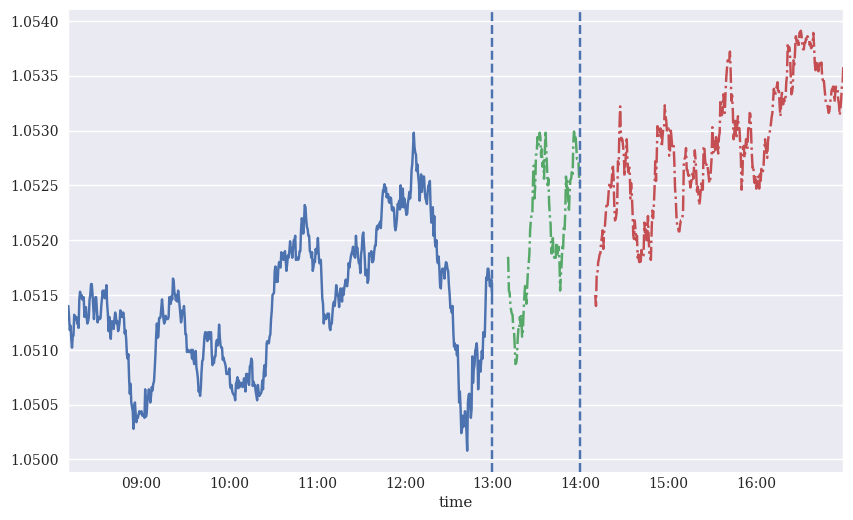

In [63]:
ax = learn_env.data[learn_env.symbol].plot(figsize=(10, 6))
plt.axvline(learn_env.data.index[-1], ls='--')
valid_env.data[learn_env.symbol].plot(ax=ax, style='-.')
plt.axvline(valid_env.data.index[-1], ls='--')
test_env.data[learn_env.symbol].plot(ax=ax, style='-.');

In [64]:
import tradingbot

In [65]:
tradingbot.set_seeds(100)
agent = tradingbot.TradingBot(24, 0.001, learn_env=learn_env,
                              valid_env=valid_env)

In [66]:
episodes = 31

In [67]:
%time agent.learn(episodes)

/Users/yves/Python/envs/aiif/lib/python3.10/site-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


episode:  5/31 | VALIDATION | treward:   97 | perf: 0.975 | eps: 0.96
episode: 10/31 | VALIDATION | treward:   97 | perf: 0.991 | eps: 0.91
episode: 15/31 | VALIDATION | treward:   97 | perf: 0.980 | eps: 0.87
episode: 20/31 | VALIDATION | treward:   97 | perf: 1.011 | eps: 0.83
episode: 25/31 | VALIDATION | treward:   97 | perf: 1.040 | eps: 0.79
episode: 30/31 | VALIDATION | treward:   97 | perf: 0.985 | eps: 0.75
episode: 31/31 | treward:  577 | perf: 0.994 | av: 375.9 | max:  577
CPU times: user 9.57 s, sys: 1.11 s, total: 10.7 s
Wall time: 8.96 s


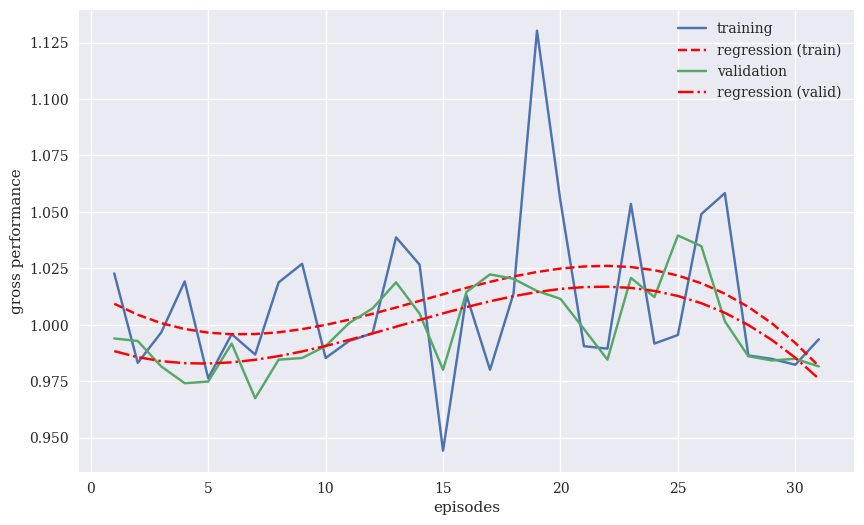

In [68]:
tradingbot.plot_performance(agent)

In [69]:
import backtest as bt

In [70]:
env = test_env

In [71]:
bt.backtest(agent, env)

In [72]:
env.data['p'].iloc[env.lags:].value_counts()

p
-1    315
 1     22
Name: count, dtype: int64

In [73]:
sum(env.data['p'].iloc[env.lags:].diff() != 0)

31

In [74]:
(env.data[['r', 's']].iloc[env.lags:] * env.leverage).sum(
        ).apply(np.exp)

r   1.03676
s   0.97486
dtype: float64

In [75]:
(env.data[['r', 's']].iloc[env.lags:] * env.leverage).sum(
        ).apply(np.exp) - 1

r    0.03676
s   -0.02514
dtype: float64

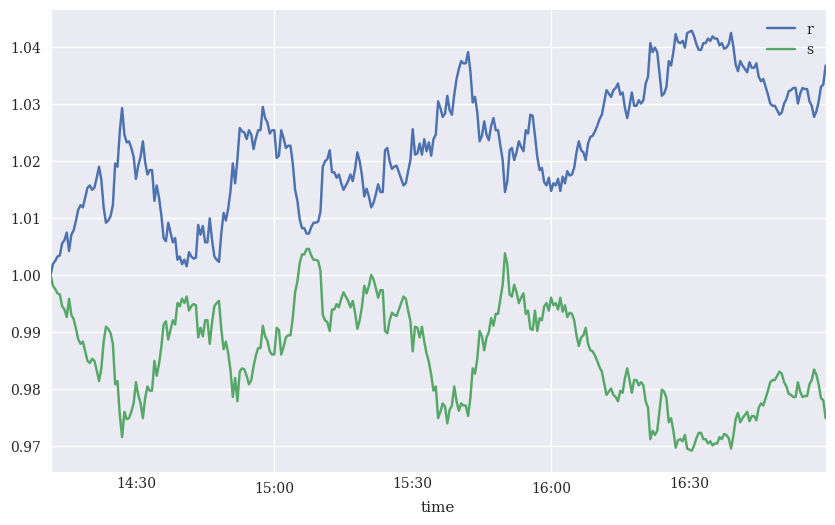

In [76]:
(env.data[['r', 's']].iloc[env.lags:] * env.leverage).cumsum(
        ).apply(np.exp).plot(figsize=(10, 6));

## Deployment

In [77]:
import tpqoa

In [78]:
class OandaTradingBot(tpqoa.tpqoa):
    def __init__(self, config_file, agent, granularity, units,
                 verbose=True):
        super(OandaTradingBot, self).__init__(config_file)
        self.agent = agent
        self.symbol = self.agent.learn_env.symbol
        self.env = agent.learn_env
        self.window = self.env.window
        if granularity is None:
            self.granularity = agent.learn_env.granularity
        else:
            self.granularity = granularity
        self.units = units
        self.trades = 0
        self.position = 0
        self.tick_data = pd.DataFrame()
        self.min_length = (self.agent.learn_env.window +
                           self.agent.learn_env.lags)
        self.pl = list()
        self.verbose = verbose
    def _prepare_data(self):
        self.data['r'] = np.log(self.data / self.data.shift(1))
        self.data.dropna(inplace=True)
        self.data['s'] = self.data[self.symbol].rolling(
                                            self.window).mean()
        self.data['m'] = self.data['r'].rolling(self.window).mean()
        self.data['v'] = self.data['r'].rolling(self.window).std()
        self.data.dropna(inplace=True)
        # self.data_ = (self.data - self.env.mu) / self.env.std  # "correct" approach
        self.data_ = (self.data - self.data.mean()) / self.data.std()  # for demonstration
    def _resample_data(self):
        self.data = self.tick_data.resample(self.granularity,
                        label='right').last().ffill().iloc[:-1]
        self.data = pd.DataFrame(self.data['mid'])
        self.data.columns = [self.symbol,]
        self.data.index = self.data.index.tz_localize(None)
    def _get_state(self):
        state = self.data_[self.env.features].iloc[-self.env.lags:]
        return np.reshape(state.values, [1, self.env.lags,
                                         self.env.n_features])
    def report_trade(self, time, side, order):
        self.trades += 1
        pl = float(order['pl'])
        self.pl.append(pl)
        cpl = sum(self.pl)
        print('\n' + 75 * '=')
        print(f'{time} | *** GOING {side} ({self.trades}) ***')
        print(f'{time} | PROFIT/LOSS={pl:.2f} | CUMULATIVE={cpl:.2f}')
        print(75 * '=')
        if self.verbose:
            pprint(order)
            print(75 * '=')
    def on_success(self, time, bid, ask):
        df = pd.DataFrame({'ask': ask, 'bid': bid,
                           'mid': (bid + ask) / 2},
                          index=[pd.Timestamp(time)])
        self.tick_data = pd.concat((self.tick_data, df))
        self._resample_data()
        if len(self.data) > self.min_length:
            self.min_length += 1
            self._prepare_data()
            state = self._get_state()
            prediction = np.argmax(
                self.agent.model.predict(state)[0, 0])
            position = 1 if prediction == 1 else -1
            if self.position in [0, -1] and position == 1:
                order = self.create_order(self.symbol,
                        units=(1 - self.position) * self.units,
                                suppress=True, ret=True)
                self.report_trade(time, 'LONG', order)
                self.position = 1
            elif self.position in [0, 1] and position == -1:
                order = self.create_order(self.symbol,
                        units=-(1 + self.position) * self.units,
                                suppress=True, ret=True)
                self.report_trade(time, 'SHORT', order)
                self.position = -1

In [79]:
import pandas as pd

In [80]:
otb = OandaTradingBot('../aiif.cfg', agent, '3s',
                      25000, verbose=False)

In [81]:
otb.tick_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Empty DataFrame


In [82]:
%time otb.stream_data(agent.learn_env.symbol, stop=200)


2023-10-09T19:55:51.267217758Z | *** GOING SHORT (1) ***
2023-10-09T19:55:51.267217758Z | PROFIT/LOSS=0.00 | CUMULATIVE=0.00

2023-10-09T19:56:21.151053448Z | *** GOING LONG (2) ***
2023-10-09T19:56:21.151053448Z | PROFIT/LOSS=-4.99 | CUMULATIVE=-4.99

2023-10-09T19:56:35.795401241Z | *** GOING SHORT (3) ***
2023-10-09T19:56:35.795401241Z | PROFIT/LOSS=-3.09 | CUMULATIVE=-8.08

2023-10-09T19:56:49.127850560Z | *** GOING LONG (4) ***
2023-10-09T19:56:49.127850560Z | PROFIT/LOSS=-3.80 | CUMULATIVE=-11.89

2023-10-09T19:57:00.367687844Z | *** GOING SHORT (5) ***
2023-10-09T19:57:00.367687844Z | PROFIT/LOSS=-2.85 | CUMULATIVE=-14.74

2023-10-09T19:57:17.277710001Z | *** GOING LONG (6) ***
2023-10-09T19:57:17.277710001Z | PROFIT/LOSS=-2.14 | CUMULATIVE=-16.88

2023-10-09T19:57:18.150440213Z | *** GOING SHORT (7) ***
2023-10-09T19:57:18.150440213Z | PROFIT/LOSS=-3.80 | CUMULATIVE=-20.68

2023-10-09T19:57:33.248099980Z | *** GOING LONG (8) ***
2023-10-09T19:57:33.248099980Z | PROFIT/LOSS=-2.

In [83]:
print('\n' + 75 * '=')
print('*** CLOSING OUT ***')
order = otb.create_order(otb.symbol,
                units=-otb.position * otb.units,
                suppress=True, ret=True)
otb.report_trade(otb.time, 'NEUTRAL', order)
if otb.verbose:
    pprint(order)
print(75 * '=')


*** CLOSING OUT ***

2023-10-09T19:57:44.839793738Z | *** GOING NEUTRAL (10) ***
2023-10-09T19:57:44.839793738Z | PROFIT/LOSS=-4.04 | CUMULATIVE=-31.14


In [84]:
pl = np.array(otb.pl)

In [85]:
pl

array([ 0.    , -4.9922, -3.0903, -3.8035, -2.8525, -2.1395, -3.8036,
       -2.6151, -3.8038, -4.0414])

In [86]:
pl.cumsum()

array([  0.    ,  -4.9922,  -8.0825, -11.886 , -14.7385, -16.878 ,
       -20.6816, -23.2967, -27.1005, -31.1419])

<img src='http://hilpisch.com/taim_logo.png' width="350px" align="right">

<br><br><br><a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:ai@tpq.io">ai@tpq.io</a>